In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cx_Oracle

In [2]:
connection = cx_Oracle.connect(user="s108261", password="s108261",
                               dsn="217.173.198.135:1521/tpdb")
cursor = connection.cursor()

In [ ]:
df1 = pd.read_sql("SELECT * FROM Factories",connection)
df2= pd.read_sql("SELECT * FROM Safety_measurements",connection)
df3 = pd.read_sql("SELECT * FROM Stock",connection)

In [ ]:
df23 = pd.merge(df2, df3, on='S_MEASURE_ID')
df123 = pd.merge(df23, df1, on='FACTORY_ID')

In [ ]:
ProdSum = df123.groupby("FACTORY_ID").size().reset_index(name="Amount")
top5 = ProdSum.nlargest(5, 'Amount')
plt.bar(top5['FACTORY_ID'], top5['Amount'], color='skyblue')
plt.xlabel('Factory ID')
plt.ylabel('Produced amount')
plt.title('Top 5 factories in production amount')
plt.xticks(top5['FACTORY_ID'])
plt.grid()

In [ ]:
SafetyPlot = df123.groupby("FACTORY_ID")['SAFETY_CLASS'].mean()


Stop5 = SafetyPlot.sort_values(ascending=False).head(5)
Stop5.plot(kind="bar")
plt.xlabel('Factory ID')
plt.ylabel('Average Safety Class level')
plt.title('Top 5 factories by average safety class level')
plt.grid()


In [ ]:
'''
import plotly.express as px

Stop5_df = Stop5.reset_index()
Stop5_df.columns = ['Factory ID', 'Average Safety Class']


wykres = px.bar(Stop5_df, x='Factory ID', y='Average Safety Class')
wykres.write_html('.html', auto_open=True)
'''

In [ ]:
suppTab = pd.read_sql("SELECT * FROM Suppliers",connection)
partsTab = pd.read_sql("SELECT * FROM Parts",connection)
skuTab = pd.read_sql("SELECT * FROM SKU",connection)
skuPartsTab = pd.read_sql("SELECT * FROM sku_parts",connection)
skuSkuParts = pd.merge(skuTab, skuPartsTab, on='SKU_ID')
SKUPARTS = pd.merge(skuSkuParts, partsTab, on='PART_ID')
SKUPARTSSUPP = pd.merge(SKUPARTS, suppTab, on='SUPP_ID')

In [ ]:
import plotly.express as px

TopSupp = SKUPARTSSUPP.groupby("SUPP_NAME").size().reset_index(name="Amount")

TopSupp.columns = ['Supplier Name','Amount']
TopSupp = TopSupp.nlargest(4,'Amount')

print(TopSupp.reset_index(drop=True))

fig = px.bar(TopSupp, x="Supplier Name", y="Amount",
            title = "Top 4 most recent suppliers") 

colors = ['red', 'green', 'blue', 'purple', 'orange']

fig.update_traces(marker_color=colors)

fig.write_html('TopSupp.html', auto_open=True)

In [ ]:
ExpSKU = SKUPARTSSUPP.groupby("NAME_x")['COST'].sum().reset_index(name='Cost')
ExpSKU.columns = ['SKU Name','SKU Cost']
ExpSKU = ExpSKU.nlargest(10,'SKU Cost').reset_index(drop=True)
print(ExpSKU)

fig2 = px.scatter(ExpSKU, x="SKU Name", y="SKU Cost",title = "Top 10 the most expensive producing SKUs")

fig2.write_html('Costs.html', auto_open=True)

In [3]:
salaryTab = pd.read_sql("SELECT * FROM Salary",connection)
factoriesTab = pd.read_sql("SELECT * FROM Factories",connection)
employeesTab = pd.read_sql("SELECT * FROM Employees",connection)
comb = pd.merge(salaryTab, factoriesTab, on='FACTORY_ID')
comb = pd.merge(comb, employeesTab, on='EMPLOYEE_ID')
print(comb)


    ID  YEAR      MONTH   SALARY  EMPLOYEE_ID  FACTORY_ID_x  \
0    1  2024      March  6518.83          405            31   
1    2  2022    January  5857.55           49            30   
2    3  2021   December  2236.59          252            15   
3    4  2020       July  3894.56           82            20   
4    5  2018       July  4562.91          529             1   
5    6  2019       June  4915.49          511            95   
6    7  2018       June  1625.04           13            37   
7    8  2019    October  5593.21          575            17   
8    9  2019      April  1781.39          325            99   
9   31  2019        May  4907.03          360            99   
10  10  2022       July  6755.53          374            98   
11  20  2022    January  3420.51          553            98   
12  11  2022    January  4668.83          289            38   
13  37  2020    January  5736.88          402            38   
14  12  2018      March  3307.57          543          

In [4]:
import seaborn as sns


   COUNTRY  Average Salary
0  Germany     5299.440000
1   Poland     4117.453784
2    Spain     2997.380000


[Text(0.5, 0, 'Countries'),
 Text(0, 0.5, 'Average salary [$]'),
 Text(0.5, 1.0, 'Average salary in countries')]

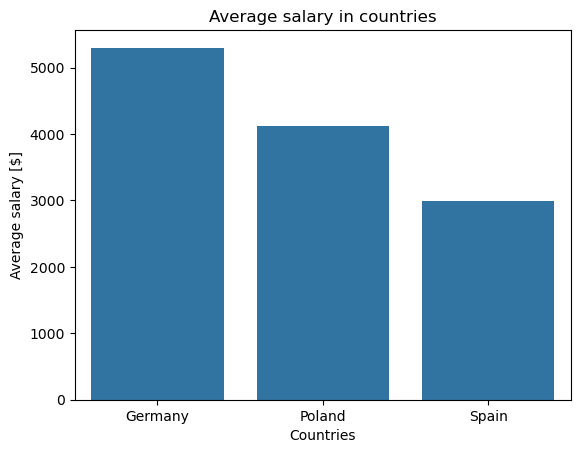

In [5]:
avgSalary = comb.groupby("COUNTRY")['SALARY'].mean().reset_index(name='Average Salary')
print(avgSalary)

figure3 = sns.barplot(x="COUNTRY", y="Average Salary", data=avgSalary)
figure3.set(xlabel='Countries', ylabel='Average salary [$]', title='Average salary in countries')




([], [])

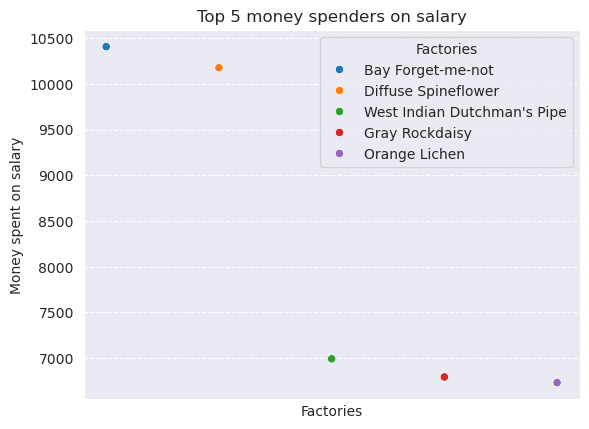

In [26]:
import math
positionStats = comb.groupby("NAME_x")['SALARY'].sum().reset_index()
positionStats = positionStats.nlargest(5,'SALARY')
positionStats.columns = ['Factories','Money spent on salary']
#positionStats = positionStats.nlargest(3,'Money spent on salary').reset_index(drop=True)
figure4 = sns.scatterplot(x="Factories", y="Money spent on salary", data=positionStats, hue = 'Factories').set(title='Top 5 money spenders on salary')
sns.set_style("darkgrid", {'grid.linestyle': '--'})
plt.xticks(ticks=[], labels=[])

